Epoch 0 : 9 / 36 - 25.00 % acc
Epoch 1 : 22 / 36 - 61.11 % acc
Epoch 2 : 33 / 36 - 91.67 % acc
Epoch 3 : 33 / 36 - 91.67 % acc
Epoch 4 : 36 / 36 - 100.00 % acc
Epoch 5 : 30 / 36 - 83.33 % acc
Epoch 6 : 34 / 36 - 94.44 % acc
Epoch 7 : 35 / 36 - 97.22 % acc
Epoch 8 : 36 / 36 - 100.00 % acc
Epoch 9 : 36 / 36 - 100.00 % acc
Epoch 10 : 36 / 36 - 100.00 % acc
Epoch 11 : 36 / 36 - 100.00 % acc
Epoch 12 : 35 / 36 - 97.22 % acc
Epoch 13 : 36 / 36 - 100.00 % acc
Epoch 14 : 36 / 36 - 100.00 % acc
Epoch 15 : 36 / 36 - 100.00 % acc
Epoch 16 : 36 / 36 - 100.00 % acc
Epoch 17 : 36 / 36 - 100.00 % acc
Epoch 18 : 35 / 36 - 97.22 % acc
Epoch 19 : 36 / 36 - 100.00 % acc
Epoch 20 : 36 / 36 - 100.00 % acc
Epoch 21 : 36 / 36 - 100.00 % acc
Epoch 22 : 36 / 36 - 100.00 % acc
Epoch 23 : 36 / 36 - 100.00 % acc
Epoch 24 : 36 / 36 - 100.00 % acc
Epoch 25 : 36 / 36 - 100.00 % acc
Epoch 26 : 36 / 36 - 100.00 % acc
Epoch 27 : 36 / 36 - 100.00 % acc
Epoch 28 : 36 / 36 - 100.00 % acc
Epoch 29 : 36 / 36 - 100.00 % acc


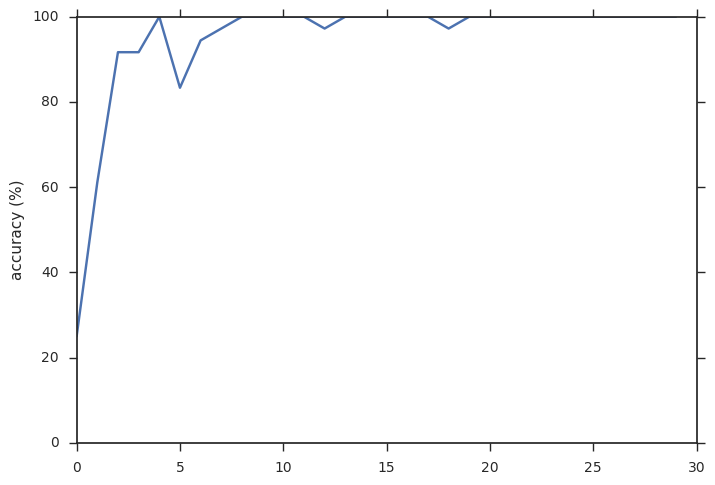

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

class Network(object):
    
    def __init__(self, sizes):
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward (self, a):
       
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        
        results = []

        n = len(training_data)
        
        if test_data: 
            n_test = len(test_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            
            mini_batches = [ training_data[k:k+mini_batch_size] 
                            for k in xrange(0, n, mini_batch_size) ]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if test_data:
                num_correct = self.evaluate(test_data)
                accuracy = "%.2f" % (100 * (float(num_correct) / n_test))
                print "Epoch", j, ":", num_correct, "/", n_test, "-", accuracy, "% acc"
                results.append(accuracy)
            else:
                print "Epoch", j, "complete"
                
        return results
    
    def update_mini_batch(self, mini_batch, eta):

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x] 
        zs = [] 
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

wine_data = np.loadtxt(open("./data/wine.csv","rb"),delimiter=",")

wine_data = shuffle(wine_data)

X = wine_data[:,1:]
y = wine_data[:, 0]

X = X / X.max(axis=0)

_, y = np.unique(y, return_inverse=True)

y = y.reshape(-1,1)

data = []
for i in range(X.shape[0]):
    data.append(tuple([X[i].reshape(-1,1), y[i][0]]))

trainingSplit = int(.8 * len(data))
training_data = data[:trainingSplit]
test_data = data[trainingSplit:]

enc = OneHotEncoder()

enc.fit(y)

training_data = [[_x, enc.transform(_y.reshape(-1,1)).toarray().reshape(-1,1)] for _x, _y in training_data]

net = Network([13, 30, 3])

results = net.SGD(training_data, 30, 2, 1.5, test_data=test_data)

plt.plot(results)
plt.ylabel('accuracy (%)')
plt.ylim([0,100.0])
plt.show()